**Exploring the fMNIST Dataset:**<br>
First, let's obtain and explore the fMNIST dataset using Keras.

Shape of x_train: (60000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


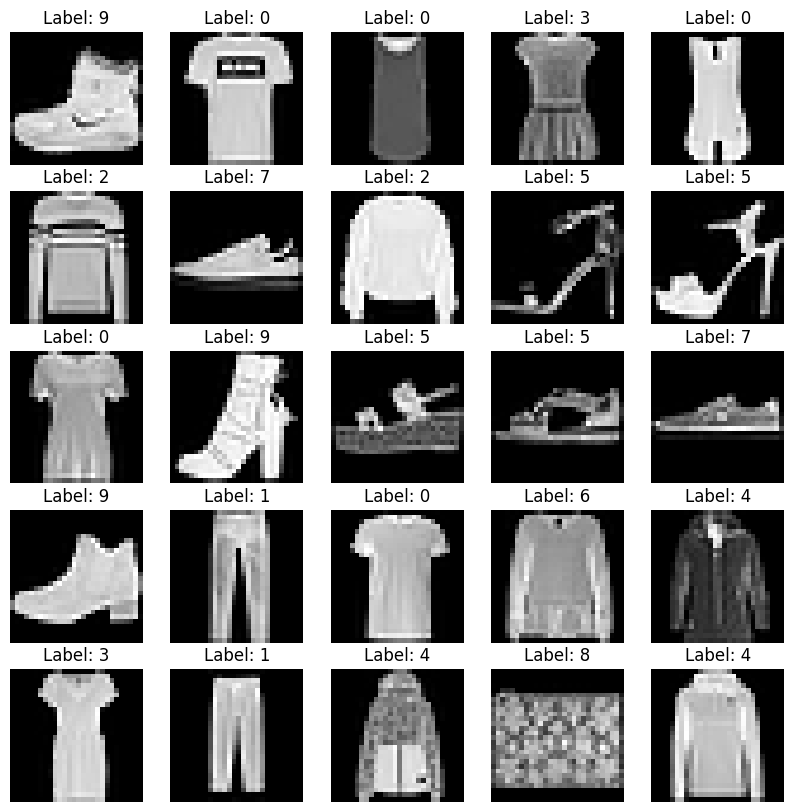

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the fMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data exploration
print("Shape of x_train:", x_train.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])
print("Number of classes:", len(set(y_train)))

# Show a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


**Train a Dense Neural Network:**<br>
Next, we will train a simple dense neural network using Keras.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images to a 1D array
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5134 - accuracy: 0.8196 - val_loss: 0.4228 - val_accuracy: 0.8468
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3776 - accuracy: 0.8613 - val_loss: 0.3890 - val_accuracy: 0.8541
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8753 - val_loss: 0.3647 - val_accuracy: 0.8669
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3172 - accuracy: 0.8829 - val_loss: 0.3408 - val_accuracy: 0.8740
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2958 - accuracy: 0.8906 - val_loss: 0.3385 - val_accuracy: 0.8782
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.8942 - val_loss: 0.3354 - val_accuracy: 0.8817
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2706 - accuracy: 0.9000 - val_loss: 0.3286 - val_accuracy:

**Evaluate the Model:**<br>
Finally, let's evaluate the model and explore some specific examples of incorrect classifications.

Test Accuracy: 0.8826000094413757
313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[783   0  22  34   3   1 151   0   6   0]
 [  4 962   1  29   2   0   1   0   1   0]
 [ 11   2 818  22  95   0  51   0   1   0]
 [ 12   3   7 934  12   0  29   0   3   0]
 [  1   0  89  66 800   0  44   0   0   0]
 [  0   0   0   0   0 952   0  36   1  11]
 [ 92   0  99  42  75   0 685   0   7   0]
 [  0   0   0   0   0   5   0 969   0  26]
 [  4   0   6   5   4   1   8   7 965   0]
 [  0   0   0   0   0  11   1  30   0 958]]


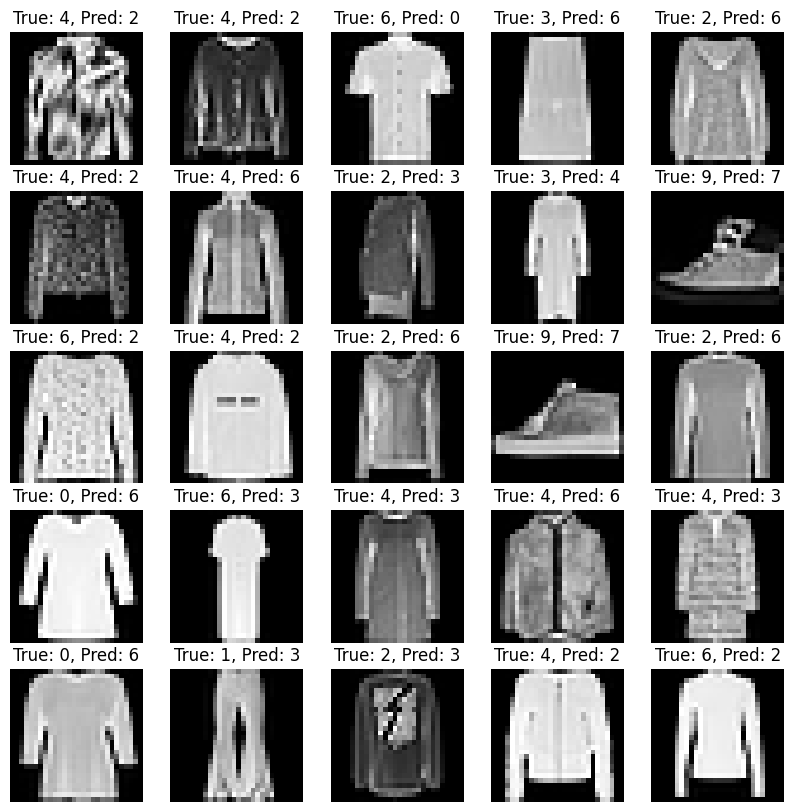

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Explore specific examples of incorrect classifications
incorrect_indices = np.where(y_pred != y_true)[0]
plt.figure(figsize=(10, 10))
for i, index in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {y_true[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()
